# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Sylfia Putri
- **Email:** Sylfia02@gmail.com
- **ID Dicoding:** Sylfia Putri

## Menentukan Pertanyaan Bisnis

- Kategori produk mana yang memberikan kontribusi revenue terbesar dan terkecil, serta memiliki volume penjualan tertinggi dan terendah?
- Wilayah mana yang memiliki jumlah order dan revenue tertinggi?
- Kategori produk mana yang memiliki rata-rata rating tertinggi dan terendah?
- Metode Pembayaran mana yang paling sering digunakan pelanggan?
- Bagaimana perilaku pelanggan berdasarkan Recency, Freuency, dan Monetary(RFM)?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
#Load tabel customers
customers_df = pd.read_csv('E-Commerce Public Dataset/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
#Load tabel orders
orders_df = pd.read_csv('E-Commerce Public Dataset/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
#load order items
order_items_df = pd.read_csv('E-Commerce Public Dataset/order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
#Load tabel products
product_df = pd.read_csv('E-Commerce Public Dataset/products_dataset.csv')
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [6]:
#Load tabel order reviews
order_reviews_df = pd.read_csv('E-Commerce Public Dataset/order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
#load order payments
order_payments_df = pd.read_csv('E-Commerce Public Dataset/order_payments_dataset.csv')
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**Insight:**

Pada proyek ini terdapat 6 tabel yang akan digunakan untuk analisis , diantara lain:
- Tabel Costumers : Tabel ini menyimpan berbagai informasi terkait customers yang terdiri dari customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state
- Tabel orders : Tabel ini menyimpan berbagai informasi terkait sebuah order yang terdiri dari order_id, custumer_id, order_status,order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date,  order_estimated_delivery_date
- Tabel Order items : Tabel ini menyimpan berbagai informasi terkait order yang terdiri dari order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value
- Tabel Products : Tabel ini menyimpan berbagai informasi terkait product yang terdiri dari product_id,	product_category_name, product_name_lenght, product_description_lenght,	product_photos_qty,	product_weight_g	product_length_cm, product_height_cm, product_width_cm
- Tabel Order Review : Tabel ini menyimpan berbagai informasi terkait review pelanggan dari tiap order, yang terdiri review_id, order_id	review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp.
- Tabel order payment : Tabel ini berisi informasi metode pembayaran yang digunakan pelanggan, yang terdiri dari order_id, payment_sequential	payment_type, payment_installments dan payment_value


## **Assessing Data**

Selanjutnya masuk ke tahap assessing data, assessing data dilakukan untuk mengidentifikasi masalah yang terdapat dalam data dan memastikan data berkualitas.

### Assessing Data Customer_df

In [8]:
# Menilai data customers_df
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Tabel data customers memiliki 99441 data dengan 5 kolom. Hasil menunjukkan tidak ada masalah dengan tipe data dari seluruh kolom tersebut dan tidak ada missing value pada jumlah data di tabel customers.Tabel customers hanya memiliki satu tipe data integer di kolom customer_zip_code_prefix, selain itu semua tipe data bersifat object.

In [9]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak ditemukan duplikasi pada data customers_df

In [10]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


Saat melakukan describe hanya menampilkan satu kolom saja yang bersifat numerik yaitu kolom customer_zip_code_prefix, dikarenakan describe secara default hanya menampilkan kolom numerik. 
Dan hasil nya tidak ditemukan inaccurate data pada tabel customers_df.

### Assessing Data orders_df

In [11]:
#Menilai data orders_df
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


- Dapat dilihat terdapat kesalahan tipe data untuk order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date. Kelima kolom tersebut harusnya dipresentasikan sebagai tipe data datetime, bukan object(object digunakan untuk tipe data string).
- Selain itu, Hasil menunjukkan terdapat 3 kolom yang memiliki jumlah data berbeda yaitu pada kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date. Hal ini menunjukkan adanya missing value pada ketiga kolom tersebut. Untuk memastikan akan menjalankan kode berikut ini.

In [12]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Hasil di atas menunjukkan terdapat 160 missing values pada kolom order_approved_at, 1783 misiing value pada kolom order_delivered_carrier_date, dan 2965 missing value pada kolom order_delivered_customer_date.
Kolom yang memiliki missing value terbanyak berada di kolom order_delivered_customer_date.

Masalah ini dapat ditangani pada tahap data cleaning.

In [13]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak di temukan dupilkasi data pada tabel order_df

In [14]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


Tidak di temukan keanehan atau inaccurate data pada tabel orders_df

### Assessing Data Order_items

In [15]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Table order items memiliki data sebanyak 112650 data dengan 7 kolom. Hasil menunjukkan tidak ada masalah dengan tipe data dari seluruh kolom tersebut dan tidak ada missing value pada jumlah data di tabel order_items.

In [16]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada duplikasi data pada tabel order_items_df

In [17]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


Berdasarkan statistik deskriptif, mayoritas transaksi terdiri dari 1 item per order. Distribusi harga dan biaya pengiriman menunjukkan pola skewed ke kanan

### Assessing Data product_df

In [18]:
#Menilai Data product_df
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Dataset products terdiri dari 32951 baris data dengan 9 kolom. Namun terdapat perbedaan jumlah data pada beberapa kolom. Hal ini menunjukkan adanya missing value pada kolom tersebut, untuk memastikannya akan dijalankan kode tersebut.

In [19]:
product_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

- Pada kolom product_category_name, product_name_lenght, product_description_lenght, product_photos_qty memiliki jumlah sebanyak 32341, yang berarti terdapat 610 missing value pada kolom kolom tersebut
- Sedangkan pada kolom product_weight_g, product_length_cm, product_height_cm, product_width_cm memiliki jumlah 32949, yang berarti terdapat 2 missing value.

Pada tahap cleaning akan dilakukan tindakan pada missing value

In [20]:
print("Jumlah duplikasi: ", product_df.duplicated().sum())

Jumlah duplikasi:  0


Hasil diatas menunjukkan bahwa tidak ada duplikasi pada product_df.

In [21]:
product_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Berdasarkan statistik deskriptif, sebagian besar nilai masih berada dalam rentang yang realistis. Namun, terdapat indikasi potensi inaccurate value pada variabel product_weight_gr karena ditemukan nilai minimum sebesar 0 gram, yang secara logis tidak mungkin terjadi. Oleh karena itu, diperlukan validasi lebih lanjut untuk memastikan kualitas data sebelum digunakan dalam analisis lanjutan.

### Assessing Data Order Reviews

In [22]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


- Dataset order_reviews terdiri dari 99.224 data dengan 7 kolom. Kolom utama seperti review_id, order_id, dan review_score tidak memiliki missing value, sehingga data rating pelanggan tergolong lengkap. Namun, kolom komentar (review_comment_title dan review_comment_message) memiliki banyak nilai kosong, yang menunjukkan bahwa sebagian besar pelanggan hanya memberikan rating tanpa menuliskan ulasan.
- Kolom review_creation_date dan review_answer_timestamp masih bertipe object dan perlu dikonversi ke datetime untuk analisis lanjutan. 

In [23]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Terdapat missing value pada kolom review_comment_title dengan jumlah 87656 dan review_comment_message berjumlah 58247. 

In [24]:
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak ditemukan duplikasi data pada tabel order_review.

In [25]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


Hasil menunjukkan rata rata review score yang diberikan pelanggan sebesar 4.  Nilai maksimal yang diberikan pelanggan sebesar 5 dan nilai terkecil yang diberikan adalah 1 .

### Assessing Data order_payment

In [26]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


Table order payment memiliki data sebanyak 103886 data dengan 4 kolom. Hasil menunjukkan tidak ada masalah dengan tipe data dari seluruh kolom tersebut dan tidak ada missing value pada jumlah data di tabel order_payment.

In [27]:
#duplikat
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak terdapat duplicate data pada tabel order_payment_df.

In [28]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


**Insight:**
- customers_df: Dataset customers berada dalam kondisi bersih dan siap digunakan untuk analisis lanjutan tanpa perlu proses data cleaning tambahan.

- orders_df: Permasalahan utama pada dataset ini terdapat pada format tipe data dan kelengkapan informasi pengiriman. Diperlukan konversi tipe data ke datetime pada 5 kolom: order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date. Selain itu, perlu dilakukan analisis lebih lanjut terhadap missing value pada 3 kolom: order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date.

- order_items_df: Tidak ditemukan missing value maupun data duplikat.

- products_df: Permasalahan utama terdapat pada kelengkapan data, dengan missing value di 8 kolom: product_category_name, product_name_lenght, product_description_lenght, product_photos_qty,product_weight_g, product_length_cm, product_height_cm,dan  product_width_cm . Selain itu, ditemukan data yang tidak akurat, misalnya nilai berat 0 gram, sehingga perlu divalidasi dan dianalisis lebih lanjut.

- order_review_df: Dataset order_review_df terdapat missing value pada kolom review_comment_tittle dan review_comment_message. Hal tersebut dikarenakan sebagian besar pelanggan hanya memberikan rating tanpa memberikan ulasan. Selain itu, untuk kolom review_answer_timestamp masih beripe object dan harus di konversi ke tipe datetime.

- order_payment_df : Tidak ditemukan missing value dan kesalahan tipe data, yang artinya tabel order_payment sudah dalam kondisi bersih

## **Cleaning Data**

Pada tahap ini akan dilakukan pembersihan data berdasarkan permasalahan yang sudah ditemukan dalam proses assessing data. Permasalahan yang sudah ditemukan diantara lain yaitu terdapat misiing value, tidak kesesuaian tipe data.

### Cleaning Data Orders_df

In [29]:
#Mengubah tipe data order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date menjadi datetime

datetime_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

for col in datetime_columns:
    orders_df[col] = pd.to_datetime(orders_df[col])

In [30]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


Tipe data pada kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date  sudah di ubah menjadi tipe data datetime.

Missing value pada kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date kemungkinan besar berkaitan dengan status pesanan. Maka dari itu untuk memastikannya akan dilakukan pengecekan hubungan kolom kolom tersebut dengan order_status.

In [31]:
date_columns = [
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
]

for col in date_columns:
    print(f"\nMissing value {col}:")
    print(orders_df[orders_df[col].isna()]['order_status'].value_counts())



Missing value order_approved_at:
order_status
canceled     141
delivered     14
created        5
Name: count, dtype: int64

Missing value order_delivered_carrier_date:
order_status
unavailable    609
canceled       550
invoiced       314
processing     301
created          5
approved         2
delivered        2
Name: count, dtype: int64

Missing value order_delivered_customer_date:
order_status
shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered         8
created           5
approved          2
Name: count, dtype: int64


Hasil di atas menunjukkan total order status yang terdapat missing value pada masing masing kolom. Berikut hasil analisis nya:
1. Order_approved_at :
- Status canceled dan created masih dapat dianggap wajar jika tidak memiliki tanggal approval, karena pesanan bisa saja dibatalkan atau belum diproses
- Namun terdapat 14 order dengan status delivered tetapi tidak memiliki tanggal approval, yang menunjukkan inkonsistensi dalam alur proses transaksi. Perlu melakukan tindakan.
2. order_delivered_carrier_date :
- Missing pada status unavailable, canceled, invoiced, processing, created, dan approved masih tergolong wajar karena pesanan belum mencapai tahap pengiriman
- Namun terdapat 2 order dengan status delivered tetapi tidak memiliki tanggal diserahkan ke kurir, yang menunjukkan inkonsistensi data. Perlu di lakukannya tindakan
3. order_delivered_customer_date
-  missing value  terdapat di shipped, canceled, unavaible, invoiced dan unavailable masih termasuk wajar.
- Namun terdapat 8 order dengan status  delivered, yang seharusnya ada. Perlu dilakukan tindakan pada data.

Oleh karena itu, diperlukan tindakan terhadap missing value yang berstatus delivered. Sebanyak 14 data pada kolom order_approved_at, 2 data pada kolom order_delivered_carrier_date dan 8 data pada kolom order_delivered_customer akan dihapus karena menunjukkan inkonsistensi dalam alur proses transaksi.

Penghapusan data dipilih karena jumlahnya relatif kecil sehingga tidak akan memengaruhi distribusi maupun hasil analisis secara signifikan.



In [32]:
#drop data order_approved_ at yang berstatus delivered
orders_df = orders_df[
    ~(
        (orders_df['order_status'] == 'delivered') &
        (orders_df['order_approved_at'].isna())
    )
]

In [33]:
#drop data order_delivered_carrier_date yang berstatus delivered
orders_df = orders_df[
    ~(
        (orders_df['order_status'] == 'delivered') &
        (orders_df['order_delivered_carrier_date'].isna())
    )
]

In [34]:
#drop data order_delivered_carrier_date yang berstatus delivered
orders_df = orders_df[
    ~(
        (orders_df['order_status'] == 'delivered') &
        (orders_df['order_delivered_carrier_date'].isna())
    )
]

In [35]:
date_columns = [
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
]

for col in date_columns:
    print(f"\nMissing value {col}:")
    print(orders_df[orders_df[col].isna()]['order_status'].value_counts())



Missing value order_approved_at:
order_status
canceled    141
created       5
Name: count, dtype: int64

Missing value order_delivered_carrier_date:
order_status
unavailable    609
canceled       550
invoiced       314
processing     301
created          5
approved         2
Name: count, dtype: int64

Missing value order_delivered_customer_date:
order_status
shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered         7
created           5
approved          2
Name: count, dtype: int64


Sudah tidak ada missing value pada kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date untuk status delivered.

### Cleaning Data Product_df

Hampir semua kolom di tabel product terdapat missing value yaitu 610 data kosong di product_name_lenght, product_description_lenght, product_photos_qty dan 2 data kosong pada kolom product_weight_g, product_length_cm, product_height_cm, product_width_cm pada tahap ini akan dilakukannya penanganan missing value dengan cara drop data. sedangkan di kolom product_category_name akan dilakukann pengisian unkown. 

In [36]:
product_df['product_category_name'].fillna('unknown', inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_20516\2518808218.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  product_df['product_category_name'].fillna('unknown', inplace=True)


In [37]:
product_df = product_df.dropna(
    subset=[
        'product_name_lenght',
        'product_description_lenght',
        'product_photos_qty',
        'product_weight_g',
        'product_length_cm',
        'product_height_cm',
        'product_width_cm'
    ]
)

- Missing value pada tabel product_df sudah sihapus atau di drop, sehingga tabel product sudah tidak ada lagi missing value.
- Produk dengan atribut utama yang tidak lengkap dihapus karena berpotensi memengaruhi analisis kualitas produk. Sementara itu, kategori produk yang kosong diisi dengan label "unknown" untuk mempertahankan kelengkapan data tanpa menghilangkan informasi lainnya.


Menangani inaccurate data pada tabel Product pada kolom product_weight_g memiliki berat 0 gram, kemungkinan ini adalah data yang tidak valid atau produk digital. Kita akan mengganti nilai berat 0 dengan NaN untuk menandai bahwa data tersebut tidak valid.

In [38]:
product_df[product_df['product_weight_g'] == 0]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
9769,81781c0fed9fe1ad6e8c81fca1e1cb08,cama_mesa_banho,51.0,529.0,1.0,0.0,30.0,25.0,30.0
13683,8038040ee2a71048d4bdbbdc985b69ab,cama_mesa_banho,48.0,528.0,1.0,0.0,30.0,25.0,30.0
14997,36ba42dd187055e1fbe943b2d11430ca,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0
32079,e673e90efa65a5409ff4196c038bb5af,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0


Terdapat 4 produk dengan nilai product_weight_g sebesar 0 gram, dikarenakan jumlah sangat dikit maka akan dilakukan pengubahan menjadi NaN dan kemudian akan di drop. 

In [39]:
product_df.loc[product_df['product_weight_g'] == 0, 'product_weight_g'] = np.nan
product_df = product_df.dropna(subset=['product_weight_g'])

Nilai product_weight_g yang berisi 0 sudah diubah menjadi NaN, dan sudah dilakukan penghapusan data untuk data tersebut.

In [40]:
product_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32336.000000,32336.000000,32336.000000,32336.000000,32336.000000,32336.000000,32336.000000
mean,48.476249,771.522483,2.189108,2277.238248,30.854651,16.957818,23.207756
std,10.246261,635.158352,1.736844,4279.481580,16.957011,13.636665,12.079273
min,5.000000,4.000000,1.000000,2.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


### Cleaning Data Order_Review_df

Pada dataset ini akan di lakukan pengubahan tipe data untuk kolom review_creation_date dan review_answer_timestamp

In [41]:
#Mengubah tipe data review_creation_date, review_answer_timestamp menjadi datetime

datetime_columns = ['review_creation_date', 'review_answer_timestamp']

for col in datetime_columns:
    order_reviews_df[col] = pd.to_datetime(order_reviews_df[col])

In [42]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


Tioe data review_creation_date dan review_answer_timestamp sudah diubah menjadi tipe data datetime. Sehingga dataset sudah bersih dan siap digunakan.

**Insight:**
- Tabel orders_df: Dilakukan konversi tipe data pada kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date menjadi tipe datetime untuk memastikan konsistensi analisis waktu. Data dengan missing value pada kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date telah dihapus sehingga dataset siap digunakan untuk analisis lanjutan.

- Tabel products_df: Missing value pada 8 kolom telah dihapus, termasuk data dengan nilai product_weight_g sebesar 0 gram yang dianggap tidak valid. Setelah proses pembersihan, dataset berada dalam kondisi bersih dan siap untuk analisis lebih lanjut.

- Tabel order_review_df : DIlakukan konversi tipe data pada kolom Tioe data review_creation_date dan review_answer_timestamp menjadi tipe datetime.

## Exploratory Data Analysis (EDA)

### Explore Data customers_df

Yang pertama akan mengeksplorasi data customers_df terlebih dahulu. Dataset ini memuat berbagai informasi terkait customer, seperti customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, dan customer_state

Ingin melihat persebaran jumlah pelanggan berdasarkan kota (city) dan negara bagian (state)

In [45]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
agisse                1
vieiras               1
bertopolis            1
abadiania             1
xexeu                 1
Name: customer_id, Length: 4119, dtype: int64

In [46]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

Berdasarkan hasil diatas, dapat dilihat bahwa persebaran pelanggan paling banyak berada di kota sao pullo, rio de janerio, bello horizonte, brasilia, dan curitiba. Selain itu pelanggan yang jumlah nya paling banyak berasal dari negara bagian SP.

### Eksplor data Orders_df

Selanjutnya akan mengeksplor orders_df yang berisi informasi terkait sebuah order yaitu order_id, customer_id, order_status, order_purchase_timestamp,  order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date.

Berdasarkan informasi tersebut, akan di buat kolom baru untuk memuat waktu pengiriman tiap order. Dengan cara menghitung selisih antar order_delivered_customer_date dan order_purchase_timestamp.

In [47]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99425 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99425 non-null  object        
 1   customer_id                    99425 non-null  object        
 2   order_status                   99425 non-null  object        
 3   order_purchase_timestamp       99425 non-null  datetime64[ns]
 4   order_approved_at              99279 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97644 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99425 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.8+ MB


In [48]:
delivery_time = orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp'] 
delivery_time = delivery_time.apply(lambda x: x.total_seconds()) 
orders_df['delivery_time'] = round(delivery_time / 86400)

In [49]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0


Sudah di tambahkan kolom baru bernama delivery time untuk meilihat durasi pengiriman, yang didapat dari selisih antara tanggal order dengan tanggak di terimanya pelanggan.

In [50]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
count,99425,99425,99425,99425,99279,97644,96461,99425,96461.000000
unique,99425,99425,8,NaN,NaN,NaN,NaN,NaN,NaN
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,96462,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 09:52:39.450268928,2017-12-31 18:39:56.659928064,2018-01-04 22:55:51.933677312,2018-01-14 13:17:13.228102400,2018-01-24 04:15:25.626351616,12.517007
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,1.000000
25%,NaN,NaN,NaN,2017-09-12 16:01:18,2017-09-12 23:24:45.500000,2017-09-15 23:45:44.750000128,2017-09-25 22:31:59,2017-10-03 00:00:00,7.000000
50%,NaN,NaN,NaN,2018-01-18 23:26:10,2018-01-19 11:54:30,2018-01-24 16:38:54,2018-02-02 19:50:56,2018-02-15 00:00:00,10.000000
75%,NaN,NaN,NaN,2018-05-04 15:55:55,2018-05-04 20:35:14.500000,2018-05-08 13:40:00,2018-05-15 23:08:54,2018-05-25 00:00:00,16.000000
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,210.000000


Berdasarkan hasil perhitungan, rata rata waktu pengiriman adalah 12 hari, median 10 hari dengan nilai minimal 1 hari. Namun, terdapat nilai maksimum hingga 2010 hari, yang mengindikasikan adanya kasus pengiriman sangat lama bisa termasuk outlier sehingga oerlu dianalisis lebih lanjut untuk memastikannya.

In [51]:
orders_df.nlargest(5,'delivery_time')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
19590,ca07593549f1816d26a572e06dc1eab6,75683a92331068e2d281b11a7866ba44,delivered,2017-02-21 23:31:27,2017-02-23 02:35:15,2017-03-08 13:47:46,2017-09-19 14:36:39,2017-03-22,210.0
55619,1b3190b2dfa9d789e1f14c05b647a14a,d306426abe5fca15e54b645e4462dc7b,delivered,2018-02-23 14:57:35,2018-02-23 15:16:14,2018-02-26 18:49:07,2018-09-19 23:24:07,2018-03-15,208.0
61610,440d0d17af552815d15a9e41abe49359,7815125148cfa1e8c7fee1ff7974f16c,delivered,2017-03-07 23:59:51,2017-03-09 01:11:33,2017-03-15 13:00:08,2017-09-19 15:12:50,2017-04-07,196.0
70307,2fb597c2f772eca01b1f5c561bf6cc7b,217906bc11a32c1e470eb7e08584894b,delivered,2017-03-08 18:09:02,2017-03-08 18:09:02,2017-03-13 08:54:02,2017-09-19 14:33:17,2017-04-17,195.0
89130,285ab9426d6982034523a855f55a885e,9cf2c3fa2632cee748e1a59ca9d09b21,delivered,2017-03-08 22:47:40,2017-03-08 22:47:40,2017-03-09 08:53:20,2017-09-19 14:00:04,2017-04-06,195.0


Ditemukan beberapa data dengan waktu pengiriman yang sangat tinggi dibandingkan rata-rata. Untuk mengidentifikasi anomali ekstrem, dilakukan perhitungan jumlah dan persentase delivery_time dengan ambang batas 100 hari sebagai threshold outlier.

In [52]:
extreme_orders = orders_df[orders_df['delivery_time'] > 50]


persentase_extreme = len(extreme_orders) / len(orders_df) * 100
print("Jumlah Extreme Orders: ", len(extreme_orders))
print("Persentase Extreme Orders: {:.2f}%".format(persentase_extreme))


Jumlah Extreme Orders:  631
Persentase Extreme Orders: 0.63%


Ditemukan 0,06% order dengan waktu pengiriman ekstrem (>100 hari). Karena proporsinya sangat kecil, kasus tersebut dikategorikan sebagai anomali dan tidak berdampak signifikan terhadap performa pengiriman secara keseluruhan.

Selanjutnya dilakukan analisis  jumlah order dan persentasenya berdasarkan status ordernya. Yang dimana status order dalam dataset ini terdiri dari delivered, shipper, canceled, unavaible, processing, created, dan approved.

In [53]:
# Hitung jumlah tiap status
counts = orders_df['order_status'].value_counts()

# Hitung persentase
percentase = orders_df['order_status'].value_counts(normalize=True) * 100

# Gabungkan dalam satu tabel
status_summary = counts.to_frame(name='Jumlah Order')
status_summary['Persentase (%)'] = percentase.round(2)

status_summary

,Jumlah Order,Persentase (%)
order_status,,
delivered,96462,97.02
shipped,1107,1.11
canceled,625,0.63
unavailable,609,0.61
invoiced,314,0.32
processing,301,0.30
created,5,0.01
approved,2,0.00


Hasil menujukkan sebagian besar pesanan berhasil diselesaikan dengan status delivered dengan jumlah order 96462 sebesar 97%. kemudian shipped dengan jumlah order 1107 dengn persentase 1.11%. Sementara itu,  pesanan yang di canceled sebanyak 626 sebesar 0.63%.

Pada tabel orders_df terdapat kolom order_delivered_customer_date yang menunjukkan tanggal pesanan diterima oleh pelanggan dan order_estimated_delivery_date yang menunjukkan estimasi waktu penerimaan. Informasi ini dapat digunakan untuk mengidentifikasi apakah pesanan dikirim tepat waktu (on time) atau mengalami keterlambatan (late).

Untuk melakukan analisis tersebut, dibuat kolom baru bernama delay_days yang menghitung selisih hari antara tanggal aktual penerimaan dan tanggal estimasi. Selanjutnya, dibuat kolom tambahan untuk mengkategorikan pesanan sebagai On Time atau Late berdasarkan hasil perhitungan tersebut.

In [54]:
#menghitung keterlambatan pengiriman
orders_df['delay_days'] = (
    orders_df['order_delivered_customer_date'] -
    orders_df['order_estimated_delivery_date']
).dt.days

In [55]:
#menambahkan kategori ontime dan terlambat
orders_df['delivery_status'] = orders_df['delay_days'].apply(
    lambda x: 'On Time' if x <= 0 else 'Late'
)

In [56]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,delay_days,delivery_status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,-8.0,On Time
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,-6.0,On Time
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,-18.0,On Time
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,-13.0,On Time
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,-10.0,On Time


In [57]:
# Hitung jumlah per status
status_count = orders_df.groupby("delivery_status")["order_id"].count()

# Hitung persentase
status_percentage = (status_count / status_count.sum()) * 100

# Gabungkan dalam satu DataFrame
status_summary = status_count.to_frame(name="Jumlah")
status_summary["Persentase (%)"] = status_percentage.round(2)

status_summary

,Jumlah,Persentase (%)
delivery_status,,
Late,9498,9.55
On Time,89927,90.45


Berdasarkan hasil perhitungan di atas, pesanan berhasil dikirim tepat waktu(on time) sejumlah 89927 data atau 90.45% sedangkan pesanan yang terlambat sebanyak 9498 data atau 9.55% dari jumlah total data di orders_df. Hal ini menunjukkan bahwa performa pengiriman secara keseluruhan tergolong sangat baik, dengan tingkat ketepatan waktu yang tinggi.

### Eksplorasi Data orders_df dan Customers_df

Untuk bisa lebih banyak memperoleh informasi terkait kedua data tersebut, maka dari itu perlu menggabungkan keduanya dengan menggunakan proses join atau merge.

In [58]:
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how='left',
    left_on='customer_id',
    right_on='customer_id'
)
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,delay_days,delivery_status,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,-8.0,On Time,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,-6.0,On Time,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,-18.0,On Time,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,-13.0,On Time,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,-10.0,On Time,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


Proses merge dilakukan dengan metode left. metode left di pilih karena ingin mengambil semua nilai dari orders_df serta nilai yang bersesuaian dengan tabel customer.
Terdapat banyak sekali informasi yang dapat di eksplor dari data orders_customers. Berikut beberapa yang bisa di eksplore:

- Jumlah order berdasarkan kota

In [59]:
orders_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).head(10)

customer_city
sao paulo                15538
rio de janeiro            6881
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1378
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: order_id, dtype: int64

Berdasarkan hasil tersebut, 3 kota yang memiliki jumlah order terbanyak yaitu sao paulo, rio de janeiro, dan belo horizonte.

- jumlah order berdasarkan state


In [60]:
orders_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).head(10)

customer_state
SP    41740
RJ    12850
MG    11632
RS     5463
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
Name: order_id, dtype: int64

Berdasarkan hasil pivot diatas, diketahui bahwa SP dan RJ adalah state yang paling banyak melakukan order.

### Eksplorasi Product_df

Nama kategori produk pada dataset products_df menggunakan bahasa Portugis, sementara tersedia dataset product_category_name_translation yang berisi terjemahan ke bahasa Inggris. Oleh karena itu, dilakukan proses merge dengan dataset terjemahan tersebut untuk mengonversi nama kategori ke bahasa Inggris agar hasil analisis dan visualisasi lebih mudah dipahami serta lebih profesional dalam penyajian laporan.

In [61]:
product_translation_df = pd.read_csv('E-Commerce Public Dataset/product_category_name_translation.csv')
product_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [62]:
products_df = product_df.merge(
    product_translation_df,
    how='left',
    left_on='product_category_name',
    right_on='product_category_name'
)
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


Sudah di tambahkan kolom product_category_name_english pada product_df

### Eksplorasi order_items_df dan product_df

Data selanjutnya yang akan dieksplor adalah order_items_df dan product_df. Kedua dataset tersebut akan di merge untuk menghasilkan informasi yang lengkap mengenai order dan product.  Berdasarkan informasi tersebut kita bisa dapat mengetahui total pendapatan, produk termurah atau termahal, produk terlaris.

In [63]:
order_product_df = pd.merge(
    left=products_df,
    right=order_items_df,
    how='left',
    left_on='product_id',
    right_on='product_id'
)
order_product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29


- Jumlah pendapatan revenue dan freight

In [64]:
total_revenue = order_product_df['price'].sum()
total_freight = order_product_df['freight_value'].sum()

print("Total Revenue:", total_revenue)
print("Total Freight:", total_freight)

Total Revenue: 13409224.920000002
Total Freight: 2223535.81


- Produk dengan harga termahal dan termurah

In [65]:
order_product_df.sort_values(by="price", ascending=False)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
20259,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,31.0,875.0,2.0,30000.0,60.0,61.0,33.0,housewares,0812eb902a67711a1cb742b3cdaa65ae,1,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31
72944,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0,computers,fefacc66af859508bf1a7934eab1e97f,1,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21
48841,1bdf5e6731585cf01aa8169c7028d6ad,artes,28.0,3954.0,2.0,7400.0,47.0,25.0,25.0,art,f5136e38d1a14a4dbd87dff67da82701,1,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66
70865,a6492cc69376c469ab6f61d8f44de961,eletroportateis,41.0,1780.0,2.0,22600.0,55.0,40.0,40.0,small_appliances,a96610ab360d42a2e5335a3998b4718a,1,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34
31828,c3ed642d592594bb648ff4a04cee2747,eletroportateis,59.0,2217.0,2.0,30000.0,50.0,49.0,50.0,small_appliances,199af31afc78c699f0dbf71fb178d4d4,1,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55169,05b515fdc76e888aada3c6d66c201dff,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,7,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89
55167,05b515fdc76e888aada3c6d66c201dff,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,5,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89
29223,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,c5bdd8ef3c0ec420232e668302179113,2,96804ea39d96eb908e7c3afdb671bb9e,2018-05-07 02:55:22,0.85,22.30
29222,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,6e864b3f0ec71031117ad4cf46b7f2a1,1,96804ea39d96eb908e7c3afdb671bb9e,2018-05-02 20:30:34,0.85,18.23


Dari hasil di atas, untuk produk termahal pada penjualan saat ini adalah utilidades_domesticas seharga 6735. Sedangkan harga termurah yaitu construcao_ferramentas_construcao dengan harga 0.85.

- Jumlah produk terjual per Kategori

In [66]:
order_product_df['product_category_name'].value_counts().head(10)

product_category_name
cama_mesa_banho           11107
beleza_saude               9670
esporte_lazer              8641
moveis_decoracao           8334
informatica_acessorios     7827
utilidades_domesticas      6964
relogios_presentes         5991
telefonia                  4545
ferramentas_jardim         4347
automotivo                 4235
Name: count, dtype: int64

In [67]:
order_product_df['product_category_name_english'].value_counts().head(10)

product_category_name_english
bed_bath_table           11107
health_beauty             9670
sports_leisure            8641
furniture_decor           8334
computers_accessories     7827
housewares                6964
watches_gifts             5991
telephony                 4545
garden_tools              4347
auto                      4235
Name: count, dtype: int64

Jumlah produk paling banyak terjual perkategorinya adalah cama_mesa_banho dengan jumlah order 11107

In [68]:
order_product_df.groupby(by="product_category_name").agg({
    "product_id" :"nunique",
    "order_id" : "nunique",
    "price" : "sum"
}).sort_values(by="price", ascending=False)

,product_id,order_id,price
product_category_name,,,
beleza_saude,2444,8836,1258681.34
relogios_presentes,1329,5624,1205005.68
cama_mesa_banho,3025,9411,1036039.18
esporte_lazer,2867,7720,988048.97
informatica_acessorios,1639,6689,911954.32
...,...,...,...
flores,14,29,1110.04
casa_conforto_2,5,24,760.27
cds_dvds_musicais,1,12,730.00


Berdasarkan hasil pivot table di atas. Kategori cama_mesa_banho merupakan kategori paling laris dengan jumlah order tertinggi (9.411 transaksi) sekaligus memiliki variasi produk terbanyak (3.025 produk). Sementara itu, kategori dengan revenue tertinggi adalah beleza_saude dengan total penjualan sebesar 1.258.681,34.

### Eksplorasi order_product_customer

Data ecommerce ini banyak memiliki informasi dan perlu ditelusuri lebih dalam lagi. Pada tahap ini akan dilakukan merge data dari order_product_df dengan orders_customer. Hal ini dilakukan untuk melihat pola pembelian berdasarkan  pelanggan.

In [69]:
order_product_customer_df = pd.merge(
    left=order_product_df,
    right=orders_customers_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
order_product_customer_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,...,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,delay_days,delivery_status,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,...,2018-04-25 17:01:00,2018-04-27 16:42:17,2018-05-09,3.0,-12.0,On Time,b1a1199364a4a7fe27c4486ab63f550d,13848.0,mogi-guacu,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,...,2018-02-05 22:44:47,2018-02-16 13:27:08,2018-02-22,16.0,-6.0,On Time,4b86049cb99e4aa774031daa9cd18f18,20551.0,rio de janeiro,RJ
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,...,2018-07-10 11:49:00,2018-07-11 23:24:16,2018-07-18,2.0,-7.0,On Time,f63805d9c7edb84d92413af34b86a39c,5821.0,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,...,2018-08-03 11:48:00,2018-08-06 15:14:32,2018-08-08,3.0,-2.0,On Time,619e926d09b26efbd5180368b1ddc874,2018.0,sao paulo,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,...,2018-04-12 22:56:27,2018-04-13 22:41:44,2018-04-26,3.0,-13.0,On Time,ad353b4fb0e294adc4eda48af73e68a6,5835.0,sao paulo,SP


In [70]:
order_product_customer_df.groupby(by=["customer_state","customer_city","product_category_name"]).agg({
    "order_id" : "nunique",
    "price" : "sum"
}).sort_values(by="price", ascending=False)

order_id  \
customer_state customer_city    product_category_name                         
SP             sao paulo        beleza_saude                           1533   
                                cama_mesa_banho                        1652   
                                relogios_presentes                      778   
                                informatica_acessorios                 1004   
                                esporte_lazer                          1266   
...                                                                     ...   
               tupa             construcao_ferramentas_construcao         1   
               palmeira d'oeste informatica_acessorios                    1   
GO             caldas novas     fashion_underwear_e_moda_praia            1   
MG             extrema          musica                                    1   
SP             hortolandia      construcao_ferramentas_construcao         1   

                                                                       price  
customer_state customer_city    product_category_name                         
SP             sao paulo        beleza_saude                       189361.87  
                                cama_mesa_banho                    170575.51  
                                relogios_presentes                 165897.46  
                                informatica_acessorios             144635.68  
                                esporte_lazer                      144533.26  
...                                                                      ...  
               tupa             construcao_ferramentas_construcao       3.99  
               palmeira d'oeste informatica_acessorios                  3.90  
GO             caldas novas     fashion_underwear_e_moda_praia          3.90  
MG             extrema          musica                                  3.85  
SP             hortolandia      construcao_ferramentas_construcao       0.85  

[25388 rows x 2 columns]

Hasil di atas merupakan prefensi pembelian berdasarkan state pelanggan dan ketgori produk. Hasilnya Wilayah Sao Paulo (SP) menjadi kontributor penjualan terbesar dengan jumlah order dan revenue tertinggi di berbagai kategori, terutama pada beleza_saude, cama_mesa_banho, dan relogios_presentes. Hal ini menunjukkan bahwa kota Sao Paulo merupakan pasar utama dengan tingkat permintaan yang sangat tinggi.

Sebaliknya, beberapa kota seperti Tupa, Palmeira d'Oeste, dan Extrema hanya mencatat sedikit transaksi dengan nilai penjualan yang sangat kecil, sehingga kontribusinya terhadap total revenue relatif rendah.

Secara umum, penjualan terkonsentrasi di kota-kota besar, khususnya di wilayah SP, yang menjadi pusat utama aktivitas transaksi.

## Eksplorasi data full_df

Pada tahap ini akan dilakukan merge seluruh informasi data.Proses merge dilakukan untuk mengintegrasikan seluruh informasi yang tersebar di beberapa tabel menjadi satu dataset terstruktur (all_df) yang siap dianalisis secara komprehensif.

Setiap tabel memiliki informasi yang berbeda dan saling melengkapi. Tabel order_product berisi detail produk dan harga, orders_customers berisi informasi pelanggan dan status pesanan, order_reviews menyimpan data kepuasan pelanggan, serta order_payments memuat metode dan nilai pembayaran. Jika dianalisis secara terpisah, maka insight yang dihasilkan akan terbatas pada masing-masing aspek saja.

In [71]:
order_base_df = pd.merge(
    left=order_product_customer_df,
    right=order_reviews_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)

In [72]:
full_df = pd.merge(
    left=order_base_df,
    right=order_payments_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
full_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,...,d71da8fd8c6e3adef26be965f065b8a1,5.0,Vale a pena,Super adooorei o delineador ele é bem preto e ...,2018-04-28,2018-05-04 00:55:02,1.0,debit_card,1.0,18.30
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,...,19866247db89845ef558ef19a6c26fcd,5.0,NaN,Excelente apontador! Em 3 segundos uma ponta p...,2018-02-17,2018-02-18 23:24:14,1.0,voucher,1.0,265.99
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,...,32921b4e09c9a19d61fe46ce04231b84,5.0,NaN,NaN,2018-07-14,2018-07-16 16:20:04,1.0,credit_card,1.0,87.62
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,...,70949d129965fb1ee32aaccec720a19e,1.0,produto divergente,modelo comprado: travesseiro memoria carinho B...,2018-08-07,2018-08-08 11:53:04,1.0,credit_card,2.0,121.84
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,...,74c9c7d0bc153bbbc92e4c1597b8ba55,5.0,NaN,NaN,2018-04-17,2018-04-18 04:29:47,1.0,credit_card,4.0,46.19


**Insight:**
- Wilayah Sao Paulo (SP) menjadi kontributor penjualan terbesar dengan jumlah order dan revenue tertinggi di berbagai kategori, terutama pada beleza_saude, cama_mesa_banho, dan relogios_presentes. Hal ini menunjukkan bahwa kota Sao Paulo merupakan pasar utama dengan tingkat permintaan yang sangat tinggi.
- Rata rata waktu pengiriman 12 hari, dengan minimal 1 hari. Namun terdapat waktu pengiriman lebih dari 100 hari.
- Pesanan yang berhasil dikirim tepat waktu(ontime) sevanyak 90.45% sedangan pesanan yang terlambat sebanyak 9.55%. Hal ini menunjukkan bahwa performa pengiriman secara keseluruhan tergolong sangat baik, dengan tingkat ketepatan waktu yang tinggi.
- Kategori produk yang paling banyak terjual adalah cama_mesa_banho atau bed_bath_table 


## Visualization & Explanatory Analysis

### Pertanyaan 1: Kategori produk mana yang memberikan kontribusi revenue terbesar dan terkecil, serta memiliki volume penjualan tertinggi dan terendah?

Untuk menjawab pertanyaan pertama, harus membuat sebuah dataFrame baru untuk menampung informasi terkait jumlah revenue penjualan tiap kategori produk dan jumlah penjualan tidap kategori produk. Pada tahap visualisasi, digunakan nama kategori dalam bahasa Inggris agar hasil analisis lebih mudah dipahami dan lebih informatif.

In [73]:
sum_revenue_category_df = full_df.groupby("product_category_name_english")["price"].sum().sort_values(ascending=False).reset_index()
sum_revenue_category_df.head(10)

,product_category_name_english,price
0,health_beauty,1301947.97
1,watches_gifts,1254322.95
2,bed_bath_table,1106299.59
3,sports_leisure,1029603.88
4,computers_accessories,950053.69
5,furniture_decor,772096.17
6,housewares,668880.94
7,cool_stuff,664637.13
8,auto,618395.50
9,garden_tools,519473.33


Kategori produk health_baauty menjadi kategori produk yang memberikan kontribusi terbesar, kontribusi revenue nya sebesar 1.301.947.97.

In [91]:

sum_order_category_df = full_df.groupby("product_category_name_english")["order_id"].nunique().sort_values(ascending=False).reset_index()
sum_order_category_df.head(10)

,product_category_name_english,order_id
0,bed_bath_table,9411
1,health_beauty,8836
2,sports_leisure,7720
3,computers_accessories,6689
4,furniture_decor,6449
5,housewares,5884
6,watches_gifts,5624
7,telephony,4199
8,auto,3897
9,toys,3886


Kategori produk bed_bath_table menjadi kategori produk yang memiliki volume penjualan tertinggi, jumlah order pada kategori ini sebanyak 9411.

Selanjutnya akan dibuat visualisasi data untuk mempermudah dalam menyampaikan informasi terkait jumlah revenue dan jumlah penjualan.

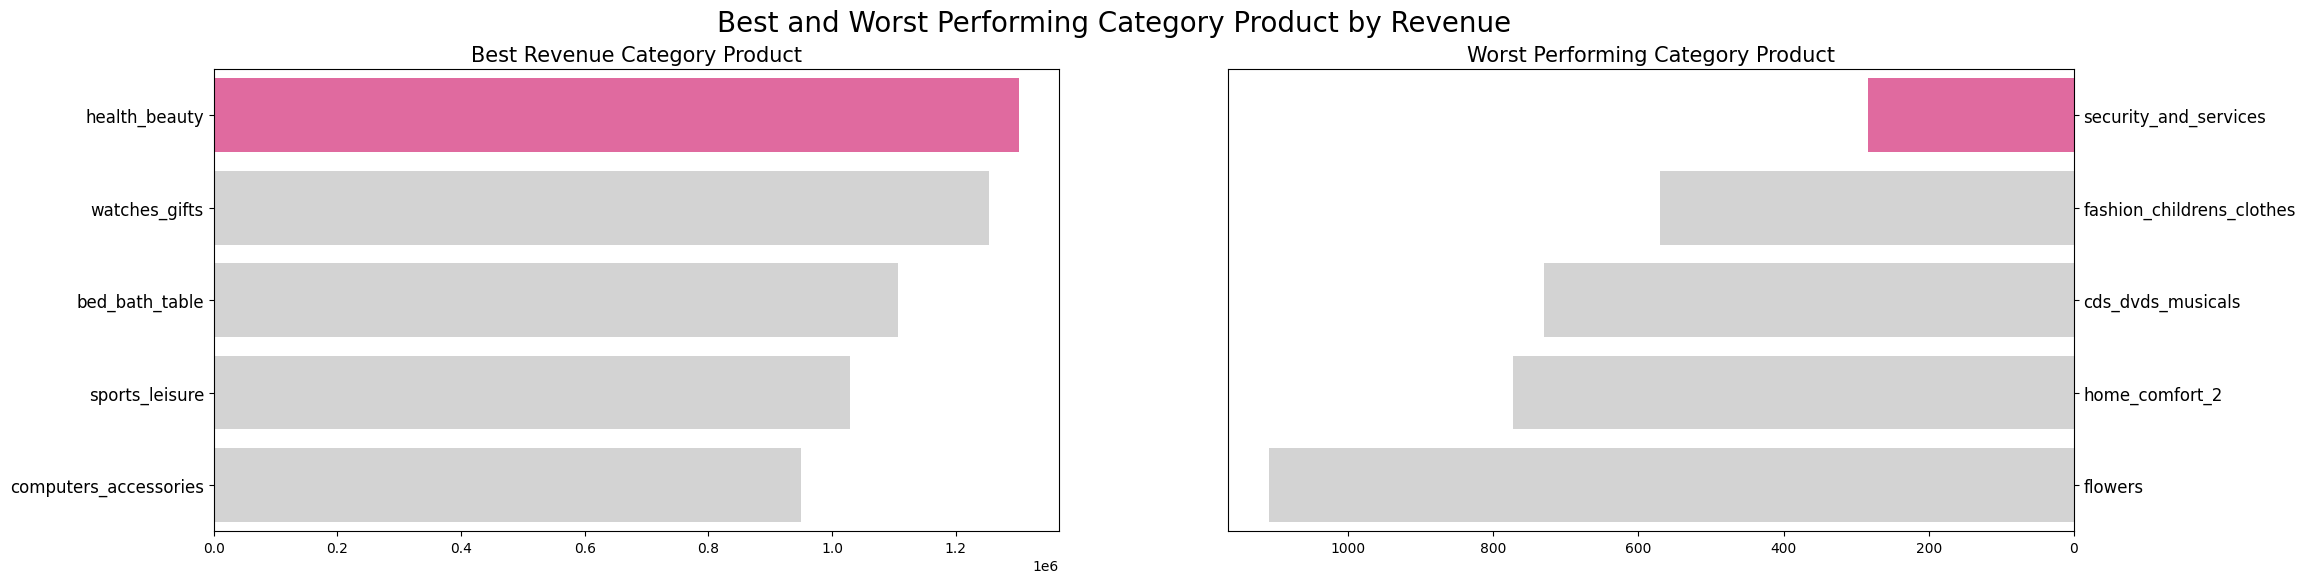

In [88]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
 
colors = ["#F3579D", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
 
sns.barplot(x="price", y="product_category_name_english", data=sum_revenue_category_df.head(5), palette=colors, hue="product_category_name_english", ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Revenue Category Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)
 
sns.barplot(x="price", y="product_category_name_english", data=sum_revenue_category_df.sort_values(by="price", ascending=True).head(5), palette=colors, hue="product_category_name_english", ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Category Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
 
plt.suptitle("Best and Worst Performing Category Product by Revenue", fontsize=20)
plt.show()

Berdasarkan hasil visualisasi di atas, bahwa kategori Produk *health_beauty* merupakan kategori produk yang memiliki kontribusi revenue terbesar dan produk *security_and_services* merupakan kategori produk yang revenue nya paling kecil.

C:\Users\hp\AppData\Local\Temp\ipykernel_20516\338809275.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_id", y="product_category_name_english", data=sum_order_category_df.head(5), palette=colors, ax=ax[0])
C:\Users\hp\AppData\Local\Temp\ipykernel_20516\338809275.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_id", y="product_category_name_english", data=sum_order_category_df.sort_values(by="order_id", ascending=True).head(5), palette=colors, ax=ax[1])


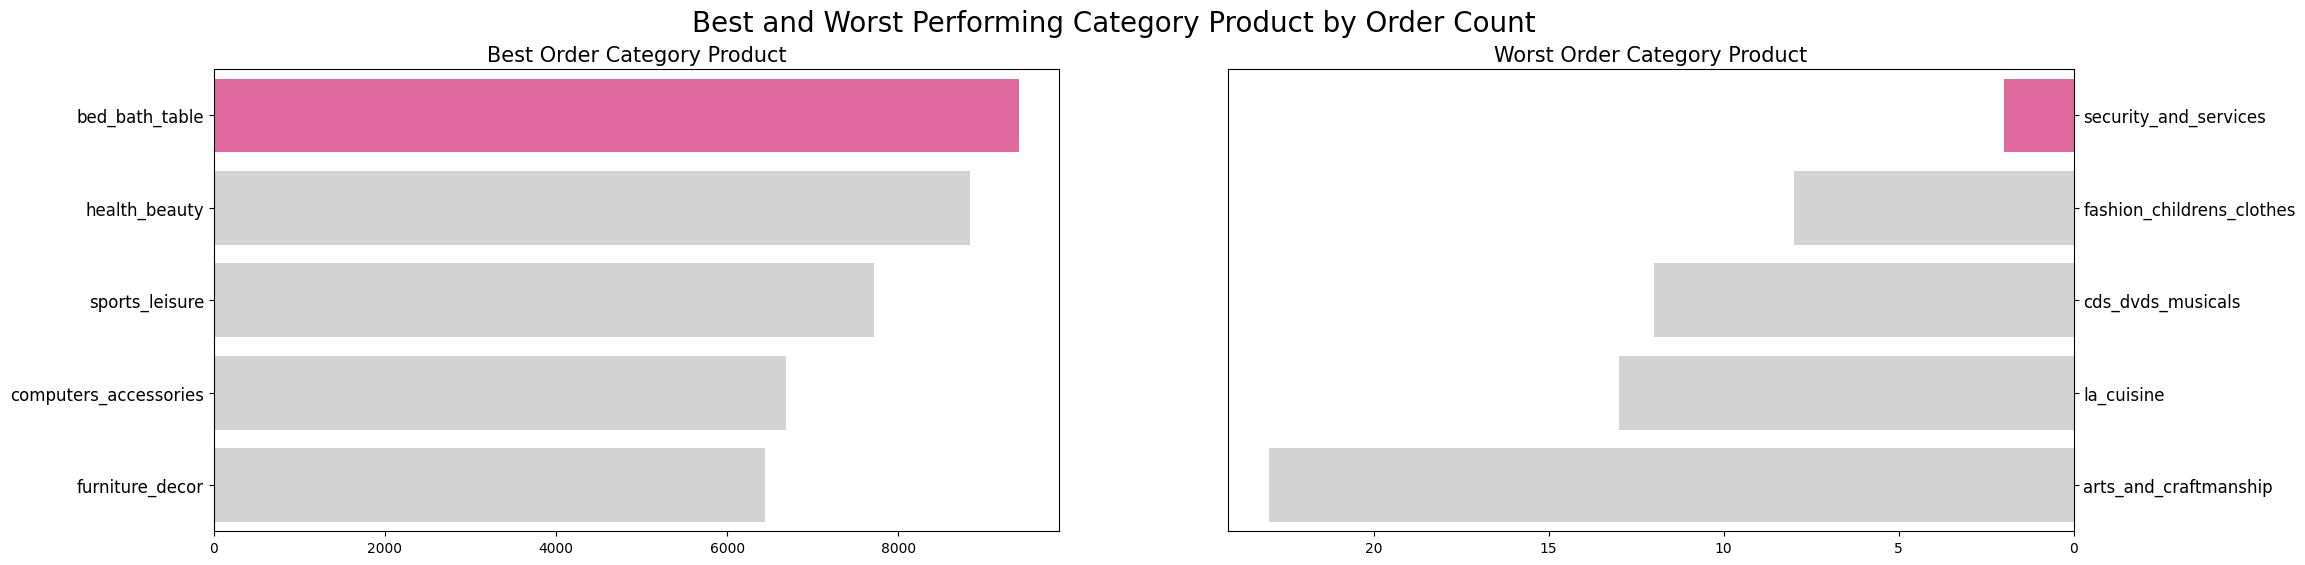

In [93]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
 
colors = ["#F3579D", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
 
sns.barplot(x="order_id", y="product_category_name_english", data=sum_order_category_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Order Category Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)
 
sns.barplot(x="order_id", y="product_category_name_english", data=sum_order_category_df.sort_values(by="order_id", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Order Category Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
 
plt.suptitle("Best and Worst Performing Category Product by Order Count", fontsize=20)
plt.show()

Berdasarkan visualisasi di atas, terlihat bahwa kategori bed_bath_table merupakan kategori dengan performa terbaik dari sisi jumlah order. Posisi berikutnya diisi oleh kategori health_beauty. Hal ini menunjukkan bahwa produk rumah tangga dan gaya hidup memiliki tingkat permintaan yang tinggi.
Sebaliknya, kategori dengan performa terendah adalah security_and_services, fashion_children dan cds_dvds_musicals. Rendahnya jumlah order pada kategori tersebut mengindikasikan bahwa minat pelanggan tergadap produk produk tersebut relatif kecil dibandingkan kategori lainnya.

### Pertanyaan 2: Wilayah mana yang memiliki jumlah order dan revenue tertinggi?

Pada pertanyaan bisnis selanjutnya, pertanyaan ini mengidentifikasi wilayah dengan pernjualan jumlah order terbanyak dan wilayah yang memberikan revenue tertinggi. untuk itu harus membuat sebuah dataFrame baru untuk menampung informasi terkait jumlah order dan revenue tiap wilayah.

In [77]:
sum_revenue_state_df = full_df.groupby("customer_state")["price"].sum().sort_values(ascending=False).reset_index()
sum_revenue_state_df.head(10)

,customer_state,price
0,SP,5402196.38
1,RJ,1896889.60
2,MG,1627210.15
3,RS,780511.35
4,PR,700216.99
5,BA,534822.24
6,SC,532314.85
7,DF,312420.48
8,GO,303894.85
9,ES,283110.23


Dari hasil di atas, wilayah Sao Paulo(SP) menjadi wilayah yang memberikan revenue tertinggi, di susul dengan wilayah RJ.

In [78]:

sum_order_state_df = full_df.groupby("customer_state")["order_id"].nunique().sort_values(ascending=False).reset_index()
sum_order_state_df.head(10)

,customer_state,order_id
0,SP,40805
1,RJ,12569
2,MG,11375
3,RS,5348
4,PR,4928
5,SC,3553
6,BA,3314
7,DF,2094
8,ES,2008
9,GO,1958


Wilayah Sao Paulo(SP)  juga menjadi wilayah dengan order terbanyak. Selanjutnya akan di buat visualisasi data dari hsail analis sebelumnya guna untuk mempermudah mengidentifikasinya.

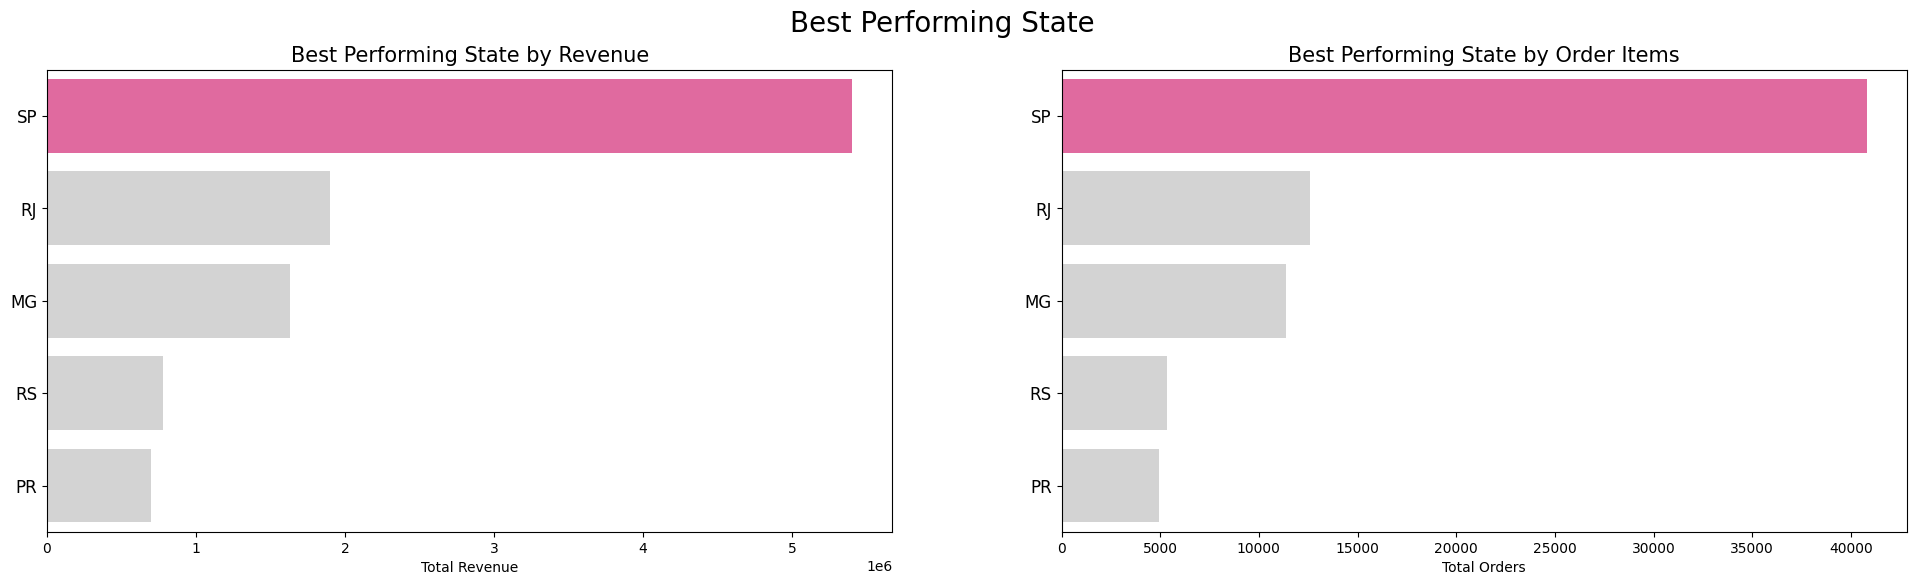

In [79]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
 
colors = ["#F3579D", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
 
sns.barplot(x="price", y="customer_state", data=sum_revenue_state_df.head(5), hue="customer_state", palette=colors,legend=False, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel("Total Revenue")
ax[0].set_title("Best Performing State by Revenue", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)
 
sns.barplot(x="order_id", y="customer_state", data=sum_order_state_df.head(5), hue="customer_state", palette=colors, legend=False, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel("Total Orders")
ax[1].set_title("Best Performing State by Order Items", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
 
plt.suptitle("Best Performing State ", fontsize=20)
plt.show()

Berdasarkan grafik, Sao Paulo (SP) merupakan wilayah dengan performa terbaik baik dari sisi total revenue maupun jumlah order. SP memiliki selisih yang cukup signifikan dibandingkan wilayah lainnya, menunjukkan bahwa wilayah ini menjadi pasar utama dan kontributor terbesar terhadap penjualan.

### Pertanyaan 3: Kategori produk mana yang memiliki rata-rata rating tertinggi dan terendah?

Untuk mengetahui kategori produk yang memiliki rata-rata rating tertinggi dan terendah, dilakukan proses pengelompokan (groupby) berdasarkan product_category_name_english, kemudian dihitung nilai rata-rata (mean) dari kolom review_score pada setiap kategori.

Dengan cara ini, kita dapat melihat tingkat kepuasan pelanggan terhadap masing-masing kategori produk secara keseluruhan.

In [80]:
mean_rating_product_df = full_df.groupby("product_category_name_english")["review_score"].mean().sort_values(ascending=False).reset_index()
mean_rating_product_df.head(10)

,product_category_name_english,review_score
0,cds_dvds_musicals,4.642857
1,fashion_childrens_clothes,4.500000
2,books_general_interest,4.438503
3,books_imported,4.419355
4,flowers,4.419355
5,costruction_tools_tools,4.415842
6,books_technical,4.375465
7,food_drink,4.324138
8,small_appliances_home_oven_and_coffee,4.320513
9,luggage_accessories,4.295945


C:\Users\hp\AppData\Local\Temp\ipykernel_20516\2072037738.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="review_score", y="product_category_name_english", data=mean_rating_product_df.head(5), palette=colors, ax=ax[0])
C:\Users\hp\AppData\Local\Temp\ipykernel_20516\2072037738.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="review_score", y="product_category_name_english", data=mean_rating_product_df.sort_values(by="review_score", ascending=True).head(5), palette=colors, ax=ax[1])


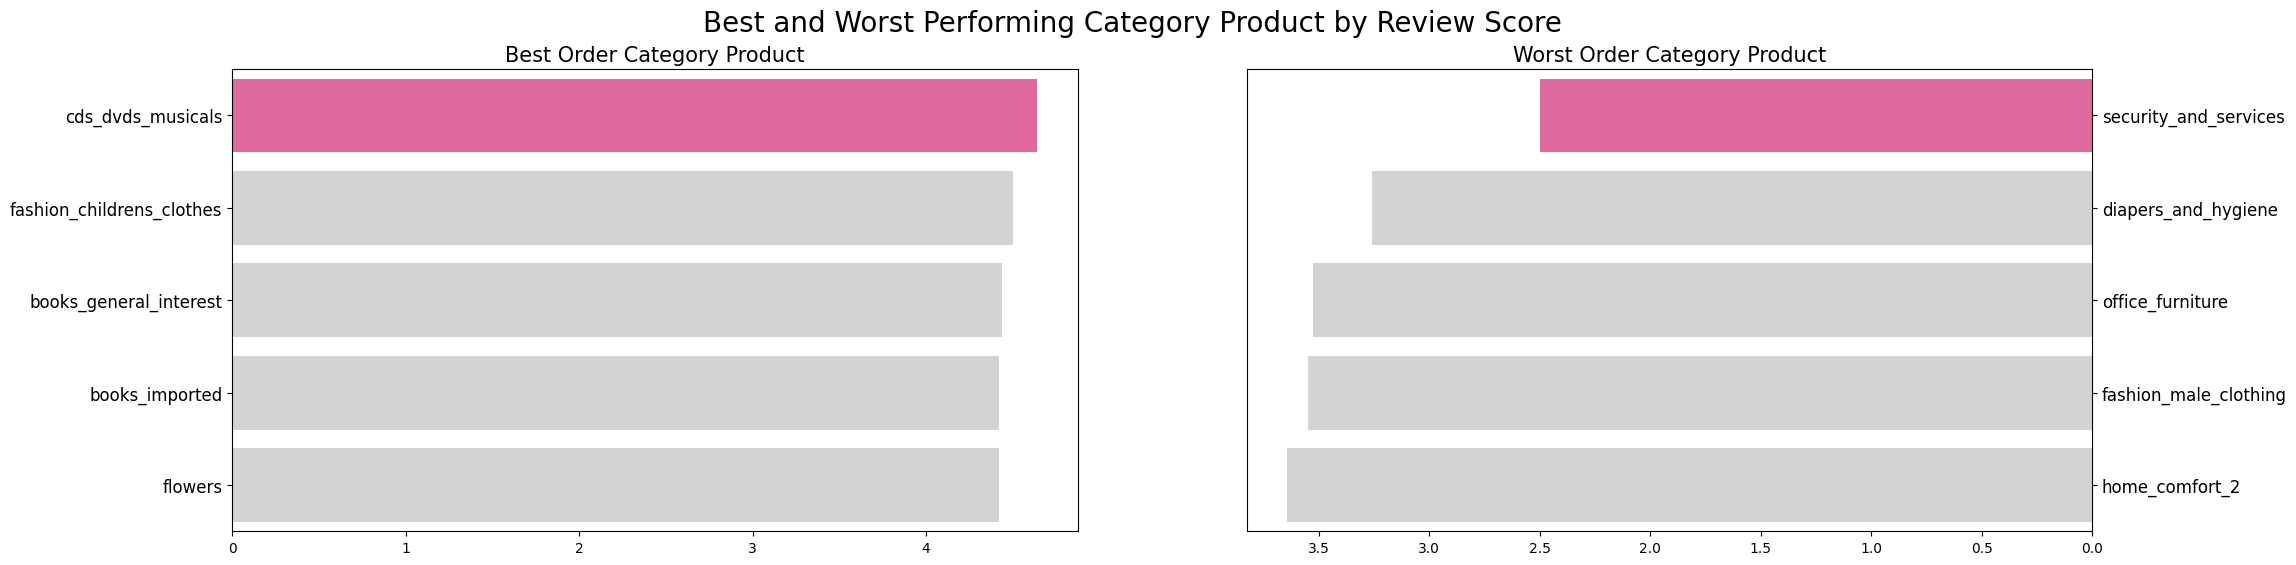

In [81]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
 
colors = ["#F3579D", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
 
sns.barplot(x="review_score", y="product_category_name_english", data=mean_rating_product_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Order Category Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)
 
sns.barplot(x="review_score", y="product_category_name_english", data=mean_rating_product_df.sort_values(by="review_score", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Order Category Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
 
plt.suptitle("Best and Worst Performing Category Product by Review Score", fontsize=20)
plt.show()

Berdasarkan visualisasi rata-rata rating, kategori dengan penilaian tertinggi adalah cds_dvds_musicals, diikuti oleh fashion_childrens_clothes, books_general_interest, construction_tools_tools, dan flowers. Hal ini menunjukkan bahwa pelanggan cenderung memberikan ulasan yang sangat baik pada kategori tersebut, sehingga dapat dikatakan memiliki tingkat kepuasan pelanggan yang tinggi.

Sebaliknya, kategori dengan rata-rata rating terendah adalah security_and_services, diikuti oleh diapers_and_hygiene, office_furniture, home_comfort_2, dan fashion_male_clothing. Kategori-kategori ini memiliki tingkat kepuasan pelanggan yang relatif lebih rendah dibandingkan kategori lainnya, sehingga berpotensi memerlukan evaluasi lebih lanjut terkait kualitas produk, pengiriman, atau layanan yang diberikan

### Pertanyaan 4 : Metode Pembayaran mana yang paling sering digunakan pelanggan?

Untuk mengetahui metode pembayaran yang paling sering digunakakan, dilakukan proses pengelompokkan (groupby) berdasarkan payment_type kemudian dihitung  jumlah order berdasarkan order id nunique pada setiap metode pembayaran..

In [94]:

sum_payment_type_df = full_df.groupby("payment_type")["order_id"].nunique().sort_values(ascending=False).reset_index()
sum_payment_type_df.head(10)

,payment_type,order_id
0,credit_card,74908
1,boleto,19351
2,voucher,3708
3,debit_card,1494


Berdasarkan hasil pengelompokkan jumlah order berdasarkan payment_type diperoleh bahwa Credit Card menjadi metode pembayaran yang paling banyk digunakan dengan total 74908 dan di posisi kedua terdapat boleto dengan sebanyak 19.351 order.
Hal ini menunjukkan bahwa mayoritas pelanggan lebih memilih menggunakan kartu kredit sebagai metode pembayaran utama.

## Pertanyaan 5 : Bagaimana perilaku pelanggan berdasarkan Recency, Freuency, dan Monetary(RFM)?

Untuk menjawab pertanyaan terkait perilaku konsumen berdasarkan RFM, digunakan metode analisis lanjutan yang dikenal sebagai RFM Analysis. Metode ini merupakan teknik yang umum dipakai dalam segmentasi pelanggan, yaitu mengelompokkan pelanggan ke dalam beberapa kategori berdasarkan tiga indikator utama: Recency (seberapa lama sejak transaksi terakhir), Frequency (seberapa sering melakukan pembelian), dan Monetary (seberapa besar total nilai transaksi). Melalui pendekatan ini, perilaku dan nilai kontribusi masing-masing pelanggan dapat dianalisis secara lebih terstruktur dan strategis.

In [83]:
rfm_df = full_df.groupby(by="customer_unique_id", as_index=False).agg({
    "order_purchase_timestamp": "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "price": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["customer_unique_id", "max_order_timestamp", "frequency", "monetary"]
 
# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
 
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_unique_id,frequency,monetary,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,160
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,163
2,0000f46a3911fa3c0805444483337064,1,69.00,586
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,370
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,337


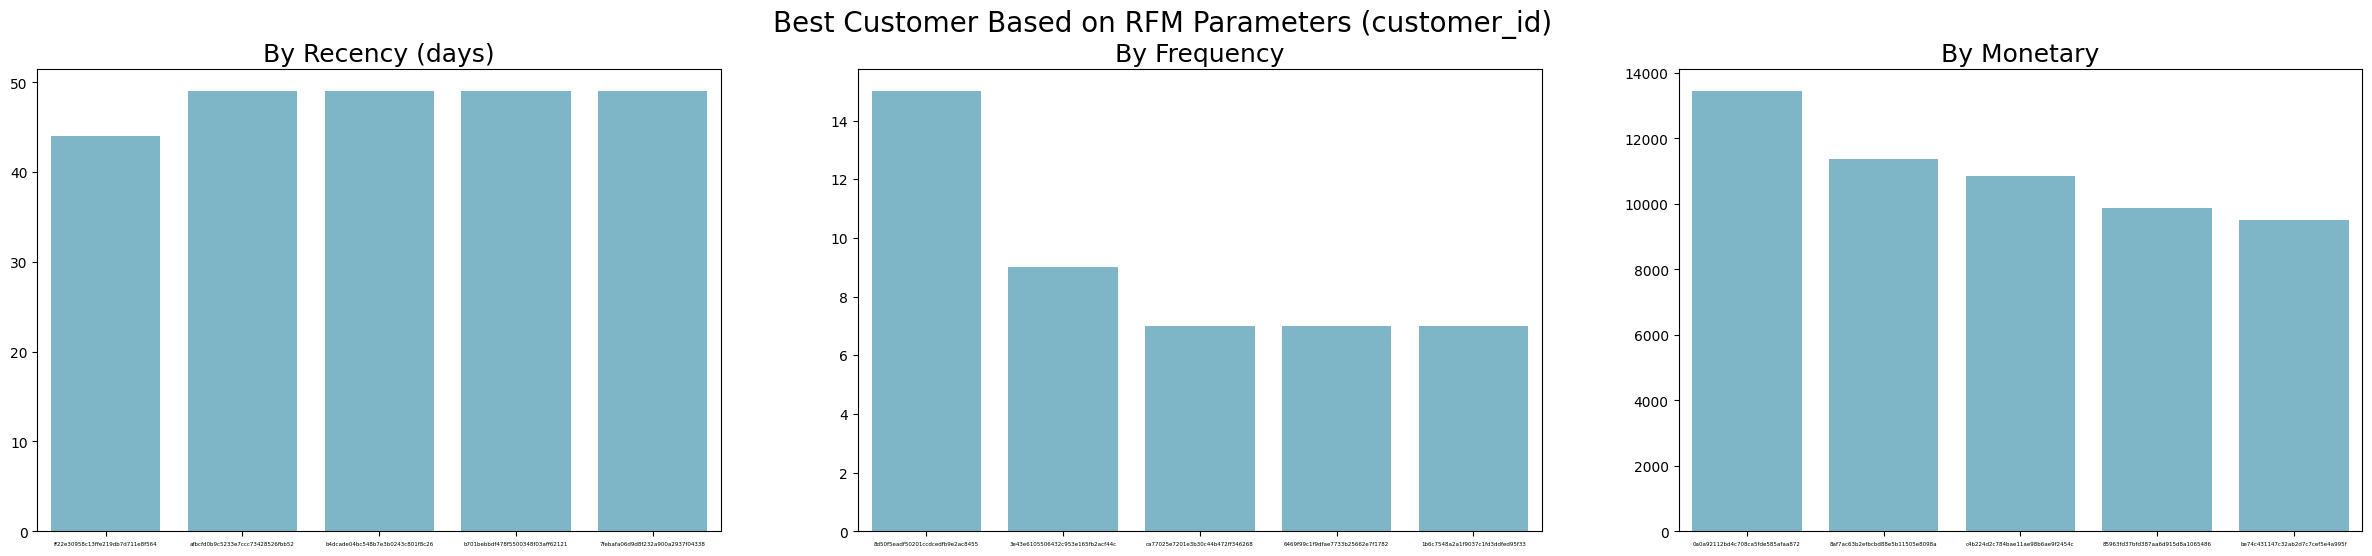

In [84]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
 
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]
 
sns.barplot(y="recency", x="customer_unique_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), hue="customer_unique_id", palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=4)
 
sns.barplot(y="frequency", x="customer_unique_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), hue="customer_unique_id", palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=4)
 
sns.barplot(y="monetary", x="customer_unique_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), hue="customer_unique_id", palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=4)
 
plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

Berdasarkan hasil perhitungan RFM, pelanggan dianalisis menggunakan tiga parameter utama yaitu Recency (seberapa lama sejak transaksi terakhir), Frequency (jumlah transaksi), dan Monetary (total nilai transaksi).

- Dari sisi Recency, pelanggan memiliki nilai recency yang relatif rendah (sekitar 44–50 hari), yang menunjukkan bahwa mereka masih tergolong aktif dan baru melakukan transaksi dalam periode yang tidak terlalu lama.
- Dari sisi Frequency, terdapat pelanggan dengan jumlah transaksi hingga 15 kali, yang menunjukkan adanya pelanggan loyal dengan tingkat pembelian berulang yang tinggi. Namun secara umum, sebagian besar pelanggan hanya melakukan satu transaksi, sehingga tingkat repeat customer dalam dataset ini relatif rendah.
- Dari sisi Monetary, terdapat pelanggan dengan total nilai transaksi mencapai sekitar 13.000+, yang menunjukkan adanya pelanggan dengan kontribusi revenue yang sangat signifikan dibanding pelanggan lainnya.

Secara keseluruhan, analisis RFM menunjukkan bahwa meskipun mayoritas pelanggan merupakan pembeli satu kali (one-time buyer), terdapat sejumlah pelanggan dengan frekuensi dan nilai transaksi tinggi yang berpotensi dikategorikan sebagai high-value customers dan dapat menjadi target utama dalam strategi retensi dan loyalty program.

## Analisis Lanjutan (Opsional)

Analisis lanjutan ini akan menganalisis berapa banyak pesanan yang dikirim tepat waktu(ontime) dan yang terlambat(late). Dilakukan dengan pengelompokkan data(groupby) berdasarkan delivery_status, kemudian dihitung jumlah order id nunique.

In [96]:

delivery_status_df = full_df.groupby("delivery_status")["order_id"].nunique().sort_values(ascending=False).reset_index()
delivery_status_df.head(10)

,delivery_status,order_id
0,On Time,88684
1,Late,8571


Hasil menunjukkan bahwa mayoritas pesanan berhasil dikirim tepat waktu, yang menandakan performa logistik secara umum sudah cukup baik. Namun, masih terdapat sejumlah pengiriman yang mengalami keterlambatan yang perlu menjadi perhatian

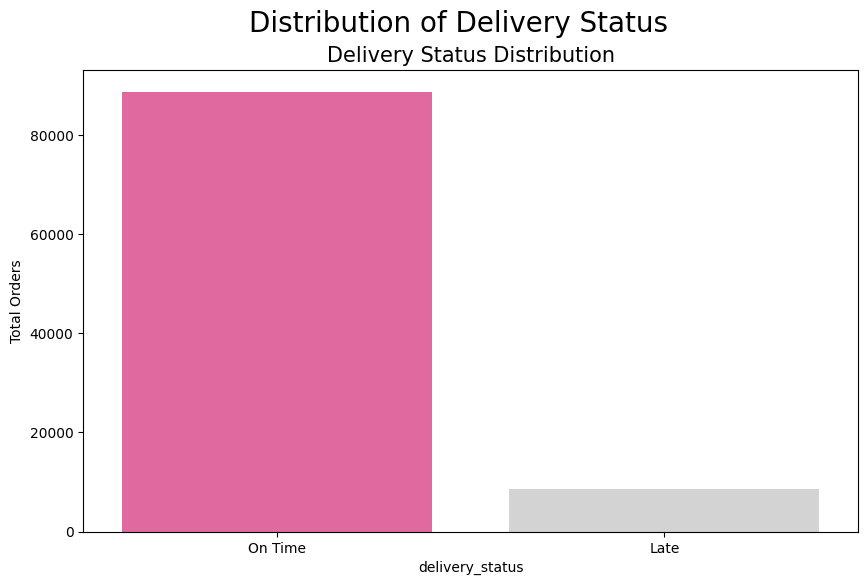

In [99]:
fig, ax = plt.subplots(figsize=(10, 6))
colors = ["#F3579D", "#D3D3D3"]
sns.barplot(x="delivery_status", y="order_id", data=delivery_status_df, palette=colors, hue="delivery_status", ax=ax)
ax.set_ylabel("Total Orders")
ax.set_title("Delivery Status Distribution", fontsize=15)
plt.suptitle("Distribution of Delivery Status", fontsize=20)    
plt.show()

Kemudian akan di cari jumlah pesanan yang ontime dan late berdasarkan wilayah(state) dilakukan dengan menggunakan pengelompokkan  atau groupby.

In [102]:
ontime_by_state_df = (
    full_df[full_df["delivery_status"] == "On Time"]
    .groupby("customer_state")["order_id"]
    .nunique()
    .sort_values(ascending=False)
    .reset_index()
)

ontime_by_state_df.head(10)

,customer_state,order_id
0,SP,38165
1,RJ,10692
2,MG,10671
3,RS,4943
4,PR,4658
5,SC,3209
6,BA,2823
7,DF,1932
8,GO,1786
9,ES,1768


Wilayah SP menjadi wilayah yang jumlah pesanan ontime nya paling tinggi yaitu 38165 pesanan

In [103]:
ontime_by_state_df = (
    full_df[full_df["delivery_status"] == "Late"]
    .groupby("customer_state")["order_id"]
    .nunique()
    .sort_values(ascending=False)
    .reset_index()
)

ontime_by_state_df.head(10)

,customer_state,order_id
0,SP,2640
1,RJ,1877
2,MG,704
3,BA,491
4,RS,405
5,SC,344
6,PR,270
7,ES,240
8,CE,218
9,PE,205


Namun setelah dianalisis yang late nya, wilayah SP juga menjadi wilayah yang pesanan terlambatnya terbanyak yaitu 2640 pesanan.

Selanjutnya, hasil analisis akan divisualisasikan dalam bentuk bar chart untuk menampilkan perbandingan jumlah pesanan yang dikirim tepat waktu (On Time) dan yang mengalami keterlambatan (Late) berdasarkan masing-masing wilayah. Visualisasi ini bertujuan untuk memudahkan identifikasi performa pengiriman di setiap wilayah secara lebih jelas dan terstruktur

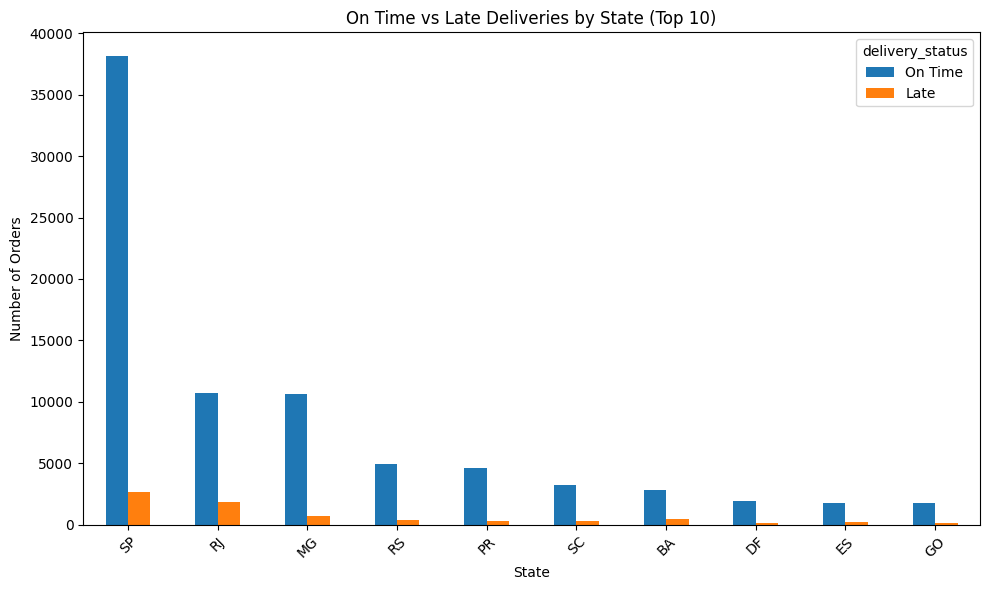

In [104]:
delivery_pivot_df = (
    full_df.groupby(["customer_state", "delivery_status"])["order_id"]
    .nunique()
    .unstack()
    .fillna(0)
    .reset_index()
)

# Ambil top 10 berdasarkan total order
delivery_pivot_df["Total"] = delivery_pivot_df["On Time"] + delivery_pivot_df["Late"]
top_states = delivery_pivot_df.sort_values(by="Total", ascending=False).head(10)

top_states.set_index("customer_state")[["On Time", "Late"]].plot(
    kind="bar",
    figsize=(10,6)
)

plt.title("On Time vs Late Deliveries by State (Top 10)")
plt.ylabel("Number of Orders")
plt.xlabel("State")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Conclusion

1. Kategori produk mana yang memberikan kontribusi revenue terbesar dan terkecil, serta memiliki volume penjualan tertinggi dan terendah?
    - Kategori health_beauty merupakan kategori dengan kontribusi revenue terbesar, sedangkan security_and_services memiliki kontribusi revenue paling kecil.
    - Dari sisi volume penjualan, kategori bed_bath_table memiliki jumlah order tertinggi, sementara security_and_services menjadi kategori dengan jumlah order terendah.
    - Hal ini menunjukkan bahwa kategori produk kebutuhan rumah tangga dan kecantikan memiliki permintaan tinggi, sedangkan kategori layanan atau niche memiliki kontribusi yang relatif kecil terhadap penjualan.

2. Wilayah mana yang memiliki jumlah order dan revenue tertinggi?
    - Sao Paulo (SP) merupakan wilayah dengan performa terbaik baik dari sisi total revenue maupun jumlah order.
    - SP memiliki selisih yang signifikan dibandingkan wilayah lain, sehingga dapat disimpulkan bahwa SP merupakan pasar utama dan kontributor terbesar terhadap penjualan secara keseluruhan.

3. Kategori produk mana yang memiliki rata-rata rating tertinggi dan terendah?
    - Kategori dengan rata-rata rating tertinggi adalah cds_dvds_musicals, diikuti oleh fashion_childrens_clothes, books_general_interest, construction_tools_tools, dan flowers, yang menunjukkan tingkat kepuasan pelanggan yang tinggi.
    - Sebaliknya, kategori dengan rating terendah adalah security_and_services, diikuti oleh diapers_and_hygiene, office_furniture, home_comfort_2, dan fashion_male_clothing, yang menunjukkan adanya potensi perbaikan dari sisi kualitas produk maupun layanan.
4. Metode pembayaran mana yang paling sering digunakan pelanggan?
    - credit card merupakan metode pembayaran yang paling sering digunakan oleh pelanggan, dengan jumlah transaksi yang jauh lebih tinggi dibandingkan metode lainnya seperti boleto dan voucher. Hal ini menunjukkan bahwa pelanggan cenderung memilih metode pembayaran yang praktis, cepat, serta menyediakan opsi cicilan.

5. Bagaimana perilaku pelanggan berdasarkan Recency, Frequency, dan Monetary (RFM)?
    - Dari sisi Recency, sebagian pelanggan tergolong masih aktif dengan jarak transaksi terakhir sekitar 44–50 hari.
    - Dari sisi Frequency, terdapat pelanggan dengan hingga 15 transaksi, menunjukkan adanya pelanggan loyal. Namun, mayoritas pelanggan hanya melakukan satu kali pembelian, sehingga tingkat repeat customer masih relatif rendah.
    - Dari sisi Monetary, terdapat pelanggan dengan total transaksi mencapai lebih dari 13.000, yang menunjukkan adanya pelanggan dengan kontribusi revenue tinggi.
    - Secara keseluruhan, meskipun sebagian besar pelanggan merupakan pembeli satu kali, terdapat segmen pelanggan bernilai tinggi (high-value customers) yang berpotensi menjadi fokus dalam strategi retensi dan pengembangan loyalitas pelanggan.
full_df.to_csv("full_df.csv", index=False)